---
## Step 0: Load The Data

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# Load pickled data
import pickle
import csv
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_dict = {'key':'value'}
with open('signnames.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sign_dict[int(row['ClassId'])] = row['SignName']
        
# proper float32 format - the range between 0.0 and 1.0 
X_train, y_train = np.float32(train['features']) / 255, train['labels']
X_valid, y_valid = np.float32(valid['features']) / 255, valid['labels']
X_test, y_test   = np.float32(test['features'])  / 255, test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_valid = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Visualization helper functions
img_h = 1.1 
img_no = 16 # per row

def random_img(X, y, class_id, img_sh = 1.1, n_random = img_no):
    plt.figure(class_id)
    fig, axs = plt.subplots(ncols=n_random, figsize=(n_random*img_sh, img_sh))
    fig.suptitle('{} random samples for class {} - {}'.format(n_random, class_id, sign_dict[class_id]), fontsize=14)
    X_rand = X[np.random.choice([idx for idx in range(len(y)) if y[idx] == class_id], n_random),:]
    for i in range(n_random):
        axs[i].imshow(X_rand[i])
        axs[i].axis('off')

def draw_range(X, y, i, cnt):
    plt.figure('{}-{}'.format(i, i + cnt - 1))
    fig, axs = plt.subplots(ncols=cnt, figsize=(cnt*img_h, img_h))
    fig.suptitle('classes {} - {}'.format(i,i+cnt-1), fontsize=14)
    for j in range(cnt):
        X_rand = X[np.random.choice([idx for idx in range(len(y)) if y[idx] == i + j], 1)]
        axs[j].imshow(X_rand[0])
        axs[j].axis('off')

def draw_all(X, y):
    row_no = n_classes//img_no
    for i in range(row_no):
        draw_range(X, y, i*img_no, img_no)
    draw_range(X, y, img_no*row_no, n_classes-img_no*row_no)

most frequent sign in training set - 2, sample number - 2010
least frequent sign in training set - 0, sample number - 180


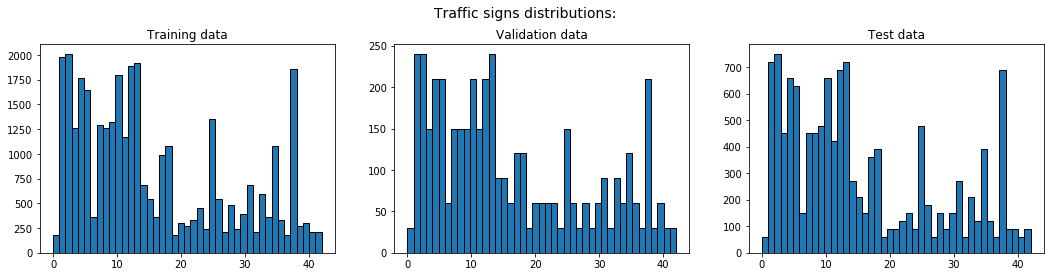

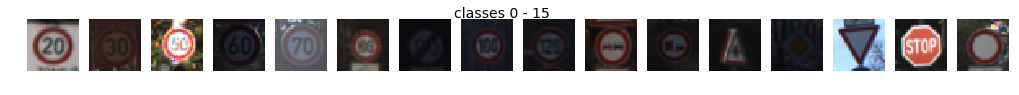

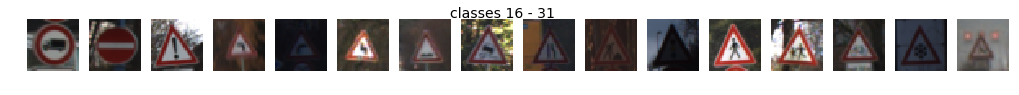

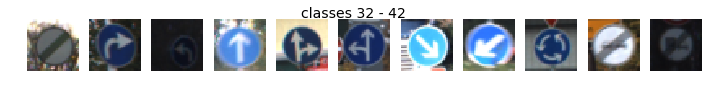

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import Counter
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure('hist')
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18, 4))
fig.suptitle('Traffic signs distributions:', fontsize=14)
bins = ax0.hist(y_train, bins=n_classes, edgecolor='black')[0]
ax0.set_title('Training data')

ax1.hist(y_valid, bins=n_classes, edgecolor='black')
ax1.set_title('Validation data')

ax2.hist(y_test, bins=n_classes, edgecolor='black')
ax2.set_title('Test data')
fig.subplots_adjust(top=0.85)

c = Counter(y_train)
max_id = max(c, key=c.get)
min_id = min(c, key=c.get)
max_cnt = c[max_id]
min_cnt = c[min_id]

print("most frequent sign in training set - {}, sample number - {}".format(max_id, max_cnt))
print("least frequent sign in training set - {}, sample number - {}".format(min_id, min_cnt))

draw_all(X_train, y_train)

### Extend the dataset via transformations

By applying horizontal, vertical translations and rotations one can substantially extend original dataset. For example, by horizontally mirroring **"dangerous curve to the left"** one obtains a new sample for **"dangerous curve to the right"** and vice-versa. In addition, certain signs are horizontally, vertically, diagonally, and/or rotationally symmetrical. For example, sign **"No vehicles"** is rotationally invariant for rotations of any angles, while signs such as **"End of all speed and passing limits"** and **"No entry"** are only rotationally symmetric for angle of pi.

In [13]:
### Functions that return translated copies of original img.
### Translations include: horizontal and vertical mirroring, 
### diagonal mirroring (+45 and -45), rotations by 90, 180, 270 degrees.
def hor_trans(X):
    '''returns horizontally mirrored copy of images in X (note dimensions!!!)'''
    return X[:,:,::-1,:]

def ver_trans(X):
    '''returns vertically mirrored copy of images in X'''
    return X[:,::-1,:,:]
   

def diag_trans_neg(X):
    '''returns -45 deg diagonally mirrored copy of images in X'''
    return np.transpose(X,[0,2,1,3])
  
def diag_trans_pos(X):
    '''returns 45 deg diagonally mirrored copy of of images in X'''
    return ver_trans(rotate90(X))

def rotate90(X):
    '''returns rotated by 90 deg copy of images in X'''
    return np.transpose(X,[0,2,1,3])[:,:,::-1,:]

def rotate180(X):
    '''returns rotated by 180 deg copy of images in X'''
    return ver_trans(hor_trans(X))

def rotate270(X):
    '''returns rotated by 270 deg copy of images in X'''
    return ver_trans(diag_trans_neg(X))

In order to decorrelate further new images from originals we will apply gaussian noise on former

In [14]:
### Function that adds gaussian noise to the data

def add_gauss(X, mean = 0, var = 0.0002, trunc = True):
    n,row,col,ch= X.shape
    sigma = var**0.5
    x_size = len(X)
    batch_size = 4096
    for offset in range(0, x_size, batch_size):
        end = offset + batch_size
        X[offset:end] = np.random.normal(mean,sigma,(len(X[offset:end]),row,col,ch))
        
    return (np.clip(X, 0, 1) if trunc else X)

#tmp = add_gauss(X_train[322:323])

In [15]:
#plt.figure
#img = X_train[322,:,:,0:3]
#plt.imshow(img)
#no = np.clip(add_gauss(X_train), 0, 1)
#no = add_gauss(X_train)
#plt.figure(3)
#plt.imshow(tmp[0])

Sign classes for symmetries are handpicked.

In [16]:
import time

ver = [1, 5, 12, 15, 17]
hor = [11, 13, 15, 17, 18, 22, 26, 30, 35]
hor_pair = {19:21, 21:19, 33:34, 34:33, 36:37, 37:36, 38:39, 39:38}
rot_180 = [15, 17, 32]
rot_any = [12, 15]
diag = [12, 15, 17, 32]

# diagonal mirroring and rotations by 90, 180 and 270 won't be applied. As it results in biased dataset towards certain signs (id: 12, 15) 
# also sign 12 (Priority road) is removed from hor intentionally (as it creates a strong bias towards it)
def symmetry_extend(X,y):
    '''returns extended dataset based on symmetry '''
    X_ext = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_ext = np.empty([0], dtype = y.dtype)
    prev_len = len(X_ext)
    for i in range(n_classes):
        if i in hor:
            X_ext = np.append(X_ext, hor_trans(X[y == i]), axis=0)
        if i in ver:
            X_ext = np.append(X_ext, ver_trans(X[y == i]), axis=0)
        # if you want to apply diagonal mirroring and rotations by 90, 180, 270 uncomment lines below
        # if i in rot_180:
        #     X_ext = np.append(X_ext, rotate180(X[y == i]), axis=0)
        #if i in rot_any:
        #    X_ext = np.append(X_ext, rotate90(X[y == i]), axis=0)
        #    X_ext = np.append(X_ext, rotate270(X[y == i]), axis=0)
        #if i in diag:
        #    X_ext = np.append(X_ext, diag_trans_pos(X[y == i]), axis=0)
        #    X_ext = np.append(X_ext, diag_trans_neg(X[y == i]), axis=0)
        y_ext = np.append(y_ext, np.full(len(X_ext) - prev_len, i, dtype=y.dtype))
        prev_len = len(X_ext)
        # for horizontal mirror pairs (left-right signs)
        if i in hor_pair:
            X_ext = np.append(X_ext,  hor_trans(X[y == i]), axis=0)
            y_ext = np.append(y_ext, np.full(len(X_ext) - prev_len, hor_pair[i], dtype=y.dtype))
        prev_len = len(X_ext)
        # add gaussian noise to new samples
        # X_ext = add_gauss(X_ext, mean = 0, var = 0.0002, trunc=True)
    
    assert len(X_ext) == len(y_ext), 'something is wrong'
    return X_ext, y_ext

t_start = time.time()
X_ext, y_ext = symmetry_extend(X_train, y_train)
X_train = np.append(X_train, X_ext, axis = 0)
y_train = np.append(y_train, y_ext, axis = 0)
t_end = time.time()
print('Symmetry extension of training dataset took {:6.2f}s'.format(t_end - t_start))

#t_start = time.time()
#X_ext, y_ext = symmetry_extend(X_valid, y_valid)
#X_valid = np.append(X_valid, X_ext, axis = 0)
#y_valid = np.append(y_valid, y_ext, axis = 0)
#t_end = time.time()
#print('Symmetry extension of validation dataset took {:6.2f}s'.format(t_end - t_start))

# we want to preserve original test dataset
#t_start = time.time()
#X_ext, y_ext = symmetry_extend(X_test, y_test)
#X_test_ext = np.append(X_test, X_ext, axis = 0)
#y_test_ext = np.append(y_test, y_ext, axis = 0)
#t_end = time.time()
#print('Symmetry extension of test dataset took {:6.2f}s'.format(t_end - t_start))


Symmetry extension of training dataset took   2.36s


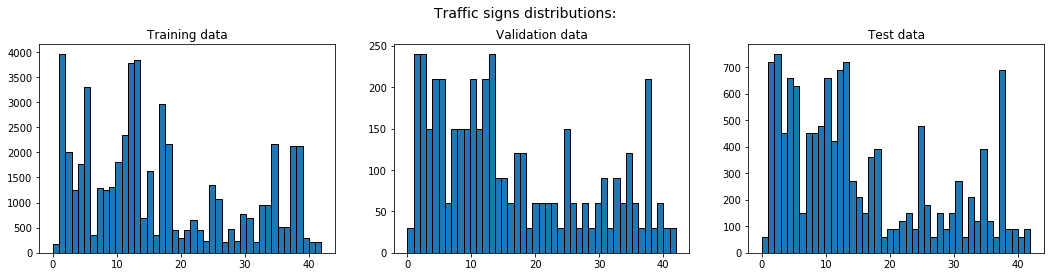

In [17]:

plt.figure('hist')
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18, 4))
fig.suptitle('Traffic signs distributions:', fontsize=14)
bins = ax0.hist(y_train, bins=n_classes, edgecolor='black')[0]
ax0.set_title('Training data')

ax1.hist(y_valid, bins=n_classes, edgecolor='black')
ax1.set_title('Validation data')

ax2.hist(y_test, bins=n_classes, edgecolor='black')
ax2.set_title('Test data')
fig.subplots_adjust(top=0.85)

After applying symmetry transformations the datasets are (even more) biased towards certain signs. For example, in the training dataset there are only a little under 200 samples for sign 0, while a little under 6000 for sign 17. We will further extend the datasets by applying openCV's affine transformation. However, we will not uniformly increase sample size for all signs, but instead will increase sample sizes in such way as to reduce dataset histogram non-uniformity. 

In [ ]:
import cv2
#from cv2 import BorderTypes
pts = np.float32([[0,0],[0,32],[32,0],[32,32]])
var = 5
new_pts = pts + np.float32(np.random.normal(0, var, pts.shape))
#M = cv2.getAffineTransform(pts,new_pts)
#T = cv2.getPerspectiveTransform(pts, new_pts)
img = X_train[322]
#dst = warp(X[i], M, output_shape=(32, image_size), order = 1, mode = 'edge')
dst = cv2.warpPerspective(img,T,(32, 32),borderMode=cv2.BORDER_REFLECT)
plt.figure(1)
plt.imshow(img[:,:,0:3])
plt.figure(2)
plt.imshow(dst[:,:,0:3])

Symmetry extension of training dataset took   3.48s


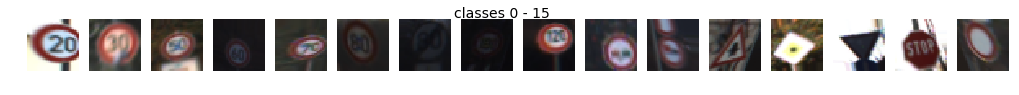

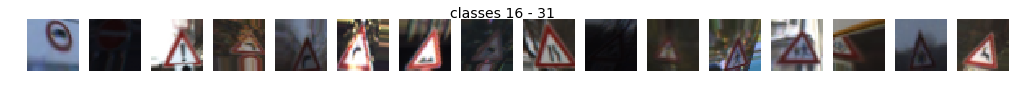

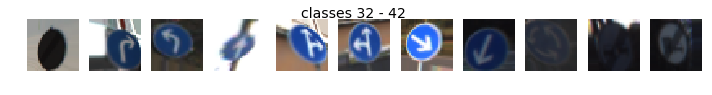

In [18]:
from collections import Counter
import cv2

def perspective_transform(x):
    # anchor points for transformation
    row, col = x.shape[0:2]
    pts = np.float32([[0,0],[0,col],[row,0],[row,col]])
    shift = 8;
    new_pts = pts + np.float32(np.random.uniform(-shift, shift, pts.shape))
    T = cv2.getPerspectiveTransform(pts, new_pts)
    x_trans = cv2.warpPerspective(x,T,(col,row),borderMode=cv2.BORDER_REPLICATE)
    return x_trans

def perspective_extend(X, y):
    '''returns extended dataset based on affine transformations
    scales most frequent class by 1.05. least frequenty by 8 
    '''
    c = Counter(y)
    max_cnt = c[max(c, key=c.get)]
    min_cnt = c[min(c, key=c.get)]
    diff    = max_cnt - min_cnt
    # new upper and lower boundary
    upper_bnd = 1.05 * max_cnt
    lower_bnd = 8.00 * min_cnt
    
    # 1. setup scale factor for each sign class
    # 2. each sample is copied copy_no: int(scale - 1) times
    # 3. remaining portion is randomly choosen from original dataset
    # 4. total: number of newly generated samples
    scale   = np.ones(n_classes, dtype=np.float32)
    copy_no = np.zeros(n_classes, dtype=np.int32) 
    remain  = np.zeros(n_classes, dtype=np.int32)
    total   = 0
    for sign_id in range(n_classes):
        cnt = c[sign_id]
        scale[sign_id] = ((upper_bnd - lower_bnd)*(cnt - min_cnt)/diff + lower_bnd)/cnt
        copy_no[sign_id] = np.int(scale[sign_id] - 1)
        remain[sign_id] = np.int((scale[sign_id] - copy_no[sign_id] - 1)*cnt)
        total += cnt * copy_no[sign_id] + remain[sign_id]
        
    X_ext = np.empty([total, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_ext = np.empty([total], dtype = y.dtype)
    ind   = 0
    for sign_id in range(n_classes):
        X_sign = X[y == sign_id]
        # each sample of a sign is copied int(scale) times
        # remaining portion is randomly choosen
        for x in X_sign:
            for i in range(copy_no[sign_id]):
                x_trans = perspective_transform(x)
                X_ext[ind] = np.reshape(x_trans, (1, x.shape[0], x.shape[1], x.shape[2]))
                y_ext[ind] = sign_id
                ind += 1
                
        X_rem = X_sign[np.random.choice([idx for idx in range(c[sign_id])], remain[sign_id]),:]
        for x in X_rem:
            x_trans = perspective_transform(x)
            X_ext[ind] = np.reshape(x_trans, (1, x.shape[0], x.shape[1], x.shape[2]))
            y_ext[ind] = sign_id
            ind += 1
    
    #X_ext = add_gauss(X_ext, mean = 0, var = 0.0002, trunc=True)
       
    return X_ext, y_ext

t_start = time.time()
X_ext, y_ext = perspective_extend(X_train, y_train)
t_end = time.time()
print('Symmetry extension of training dataset took {:6.2f}s'.format(t_end - t_start))
draw_all(X_ext, y_ext)
X_train = np.append(X_train, X_ext, axis = 0)
y_train = np.append(y_train, y_ext, axis = 0)

#t_start = time.time()
#X_ext, y_ext = perspective_extend(X_valid, y_valid)
#X_valid = np.append(X_valid, X_ext, axis = 0)
#y_valid = np.append(y_valid, y_ext, axis = 0)
#t_end = time.time()
#print('Symmetry extension of validation dataset took {:6.2f}s'.format(t_end - t_start))

# we want to preserve original test dataset
#t_start = time.time()
#X_ext, y_ext = perspective_extend(X_test, y_test)
#X_test_ext = np.append(X_test, X_ext, axis = 0)
#y_test_ext = np.append(y_test, y_ext, axis = 0)
#t_end = time.time()
#print('Symmetry extension of test dataset took {:6.2f}s'.format(t_end - t_start))

#X_valid, y_valid = perspective_extend(X_valid, y_valid)
#X_test, y_test = perspective_extend(X_test, y_test)


Printing new sizes of datasets and plotting histogram

Number of extended training examples = 34799
Number of extended testing examples = 12630
Number of extended validation examples = 4410


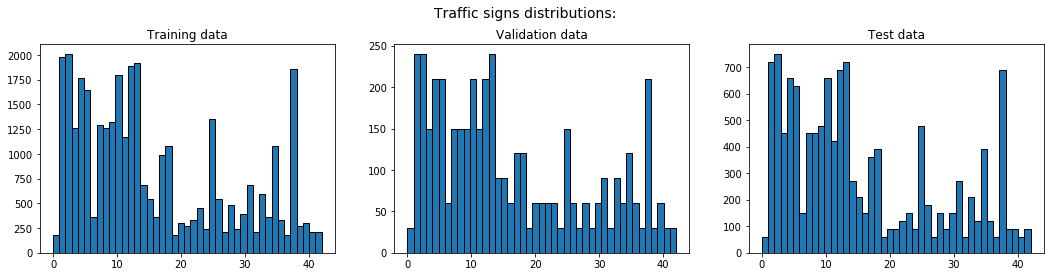

In [29]:
n_train = len(y_train)
n_valid = len(y_valid)
n_test = len(y_test)

print("Number of extended training examples =", n_train)
print("Number of extended testing examples =", n_test)
print("Number of extended validation examples =", n_valid)

plt.figure('hist')
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18, 4))
fig.suptitle('Traffic signs distributions:', fontsize=14)
bins = ax0.hist(y_train, bins=n_classes, edgecolor='black')[0]
ax0.set_title('Training data')

ax1.hist(y_valid, bins=n_classes, edgecolor='black')
ax1.set_title('Validation data')

ax2.hist(y_test, bins=n_classes, edgecolor='black')
ax2.set_title('Test data')
fig.subplots_adjust(top=0.85)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

RGB is already in float32 format (i.e. between 0 and 1). 


In [20]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.]
import cv2
import time

def rgb2intensity(X):
    '''function translates rgb to intensity (i.e. (r + g + b))
    NOTE! not divided by three, so that intensity is weighted 3 times more!'''
    return X.sum(3, keepdims=True)/3

def img_stitch(X, I):
    '''function that stitches color channels (e.g. RGB + Intensity) given in X and I'''
    assert len(X) == len(I), 'number of images do not equal'
    X_shape = X.shape
    I_shape = I.shape
    shape = (X_shape[0], X_shape[1], X_shape[2], X_shape[3] + I_shape[3])
    res = np.zeros(shape, dtype=X.dtype)
    for i in range(len(X)):
        x_img = np.reshape(X[i], (X_shape[1]*X_shape[2], X_shape[3]))
        i_img = np.reshape(I[i], (I_shape[1]*I_shape[2], I_shape[3]))
        res[i] = np.reshape(np.hstack((x_img, i_img)), (shape[1], shape[2], shape[3]))
    return res

def preprocess(X):
    '''preprocess function: 
    a. add intensity channel + apply CLAHE on it
    b. subtract 0.5 (values range from -0.5 to 0.5) 
    c. divide RGB by 3 (Intensity has 3x more weight)'''
    I = rgb2intensity(X)
    for i in range(len(I)):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
        # clahe can only be applied on 8 bit unsigned int...
        I[i] = np.reshape(np.float32(clahe.apply(np.uint8(I[i]*255)))/255, (32, 32, 1))

    res = img_stitch(X,I)
    # res = res - 0.5
    # res[:,:,:,0:3] = res[:,:,:,0:3]/3
    
    return res

t_start = time.time()
X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_valid = preprocess(X_valid)
t_end = time.time()
print('Preprocessing of datasets took {:6.2f}s'.format(t_end - t_start))


Preprocessing of datasets took   5.04s


(95121, 32, 32, 4)


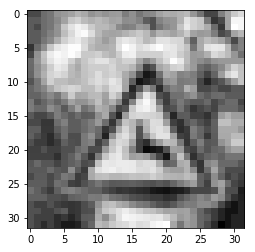

In [21]:
plt.figure
plt.imshow(X_train[223,:,:,3],'gray')
print(X_train.shape)

In [14]:
from sklearn.utils import shuffle

#batch_size = 256
#idxs = np.random.randint(0, high=len(data), size=(N,))
#n_train = 100000
#idxs = random.sample(xrange(len(data)), n_train)
#result = data[idxs]

#start_t = time.time()
#print(n_train)
#trained = np.zeros([n_train],dtype = np.uint8)
#for i in range(n_train//batch_size):
#    idxs    = np.random.choice([idx for idx in range(n_train) if trained[idx] == 0], batch_size, replace=False)
#    trained[idxs] = 1
    #print(sum(trained==1))
    #print(idxs)
    #X_rand = X_train[idxs]
    #print(trained.shape)
    #if i == 2:
    #    break
#end_t = time.time()
#print(end_t - start_t)
# print(X_rand.shape)
    
# at ~100K samples shuffle becomes memory bottleneck.
# note: np.random.permutations implementation suffers from that too
# so we will have to apply some-sort of pseudo-shuffle (not ideal)
# for that we will remove 2861 samples to leave exactly 100K
# we will remove 2861 randomly from the last 40K (perspective extension)

#X_train[-40000:], y_train[-40000:] = shuffle(X_train[-40000:],y_train[-40000:])
#X_train = X_train[0:100000]
#y_train = y_train[0:100000]

#X_train, y_train = shuffle(X_train, y_train)
#X_train = X_train[0:34000]
#y_train = y_train[0:34000]
t_start = time.time()
shuffle(X_train, y_train)
t_end = time.time()
#print(shuffle(X_train[0:3]))
#X_tmp = X_train[0:20000]
#y_tmp = y_train[0:20000]
#plt.figure()
#plt.imshow(X_tmp[0,:,:,0:3])
#start = time.time()
#X_shuff, y_shuff = shuffle(X_tmp,y_tmp)
#end = time.time()
#print(end-start)
#plt.figure(2)
#plt.imshow(X_shuff[0,:,:,0:3])
#start = time.time()
#per = np.random.permutation(len(X_tmp))
#X_shuff2 = X_tmp[per]
#y_shuff2 = y_tmp[per]
#end = time.time()
#print(end-start)
#plt.figure(3)
#plt.imshow(X_shuff2[0,:,:,0:3])

In [71]:
perm = np.random.permutation(10)
perm[[2,3,4,8]] = 1
print(perm)



[6 5 1 1 1 1 3 2 1 4]


### Model Architecture

In [29]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define your architecture here.
### Feel free to use as many code cells as needed.

col_no, row_no, ch_no = X_train.shape[1:]

# low resolution pipeline
lres = 9
lres1_depth = ch_no * 8
lres2_depth = lres1_depth * 2

# high resolution pipeline
hres = 5
hres1_depth = ch_no * 8
hres2_depth = hres1_depth * 2
# hres3_depth = hres2_depth

# flatten layers
l3_flat = 8 * 8 * hres2_depth + 8 * 8 * lres2_depth
# l3_flat = 8 * 8 * hres2_depth + 4 * 4 * hres3_depth + 8 * 8 * lres2_depth
l4_flat = l3_flat // 8
l5_flat = n_classes * 8

# Hyperparameters
mu = 0
sigma = 0.1

def etzonet(x, keep_prob):    

    ### Low resolution pipeline
    # Layer 1: Convolution. Input = 32x32x4. Output = 32x32x(lres1_depth).
    conv_lres1_W = tf.Variable(tf.truncated_normal(shape=(lres, lres, ch_no, lres1_depth), mean = mu, stddev = sigma))
    conv_lres1_b = tf.Variable(tf.zeros(lres1_depth))
    conv_lres1   = tf.nn.conv2d(x, conv_lres1_W, strides=[1, 1, 1, 1], padding='SAME') + conv_lres1_b
    conv_lres1   = tf.nn.relu(conv_lres1)
    # Max Pooling. Output = 16x16x(lres1_depth)
    conv_lres1   = tf.nn.max_pool(conv_lres1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 2: Convolutional. Output =16x16x(lres1_depth).
    conv_lres2_W = tf.Variable(tf.truncated_normal(shape=(hres, hres, lres1_depth, lres2_depth), mean = mu, stddev = sigma))
    conv_lres2_b = tf.Variable(tf.zeros(lres2_depth))
    conv_lres2   = tf.nn.conv2d(conv_lres1, conv_lres2_W, strides=[1, 1, 1, 1], padding='SAME') + conv_lres2_b
    conv_lres2   = tf.nn.relu(conv_lres2)
    # Max Pooling. Output = 8x8x(hres2_depth)
    conv_lres2   = tf.nn.max_pool(conv_lres2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    ### High resolution pipeline
    # Layer 1: Convolution. Input = 32x32x4. Output = 32x32x(hres1_depth).
    conv_hres1_W = tf.Variable(tf.truncated_normal(shape=(hres, hres, ch_no, hres1_depth), mean = mu, stddev = sigma))
    conv_hres1_b = tf.Variable(tf.zeros(hres1_depth))
    conv_hres1   = tf.nn.conv2d(x, conv_hres1_W, strides=[1, 1, 1, 1], padding='SAME') + conv_hres1_b
    conv_hres1   = tf.nn.relu(conv_hres1)
    # Max Pooling. Output = 16x16x(hres1_depth)
    conv_hres1   = tf.nn.max_pool(conv_hres1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x(hres2_depth).
    conv_hres2_W = tf.Variable(tf.truncated_normal(shape=(hres, hres, hres1_depth, hres2_depth), mean = mu, stddev = sigma))
    conv_hres2_b = tf.Variable(tf.zeros(hres2_depth))
    conv_hres2   = tf.nn.conv2d(conv_hres1, conv_hres2_W, strides=[1, 1, 1, 1], padding='SAME') + conv_hres2_b
    conv_hres2   = tf.nn.relu(conv_hres2)
    # Max Pooling. Output = 8x8x(hres2_depth)
    conv_hres2   = tf.nn.max_pool(conv_hres2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 3: Convolutional. Output = 8x8x(hres3_depth).
    #conv_hres3_W = tf.Variable(tf.truncated_normal(shape=(hres, hres, hres2_depth, hres3_depth), mean = mu, stddev = sigma))
    #conv_hres3_b = tf.Variable(tf.zeros(hres3_depth))
    #conv_hres3   = tf.nn.conv2d(conv_hres2, conv_hres3_W, strides=[1, 1, 1, 1], padding='SAME') + conv_hres3_b
    #conv_hres3   = tf.nn.relu(conv_hres3)
    # Max Pooling. Output = 4x4x(hres3_depth)
    #conv_hres3   = tf.nn.max_pool(conv_hres3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Flatten.
    #fc0   = tf.concat((flatten(conv_hres3),flatten(conv_hres2),flatten(conv_lres2)),1)
    fc0   = tf.concat(1,(flatten(conv_hres2),flatten(conv_lres2)))
    fc0   = tf.nn.dropout(fc0, keep_prob)

    # Layer 3: Fully Connected. Input = l3_flat. Output = l4_flat.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(l3_flat, l4_flat), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(l4_flat))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = l4_flat. Output = l5_flat.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(l4_flat, l5_flat), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(l5_flat))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    
    # Layer 5: Fully Connected. Input = l5_flat. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(l5_flat, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    #fc3    = tf.nn.dropout(fc3, keep_prob)
    logits = fc3
    
    # Layer 7: Fully Connected. Input = l5_flat. Output = n_classes.
    #fc4_W  = tf.Variable(tf.truncated_normal(shape=(l6_flat, n_classes), mean = mu, stddev = sigma))
    #fc4_b  = tf.Variable(tf.zeros(n_classes))
    #fc4    = tf.matmul(fc3, fc4_W) + fc4_b
    #fc4    = tf.nn.dropout(fc4, keep_prob) WHAAAAAT?
    #logits = fc4

    return logits, (conv_hres1_W, conv_hres2_W, conv_lres1_W, conv_lres2_W, fc1_W, fc2_W, fc3_W)#, fc4_W)

x = tf.placeholder(tf.float32, (None, 32, 32, ch_no))
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0001
l2_reg = 0.0001

#logits = etzonet(x, keep_prob, conv1_W, conv2_W)
logits, weights = etzonet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy + tf.add_n([ tf.nn.l2_loss(w) for w in weights ]) * l2_reg)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.    
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

EPOCHS = 100
BATCH_SIZE = 128
EPSILON = 0.00001 # if delta of validation accuracy moving average < epsilon then break
valid_array = []  # validation accuracy array 
valid_avg  = 0    # validation accuracy moving average of 3
best_accuracy  = 0
    
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
         
    print("Training...")
    for i in range(EPOCHS):
    #    trained = np.zeros([num_examples],dtype = np.uint8)
    #    for j in range(num_examples//BATCH_SIZE):
    #        idxs    = np.random.choice([idx for idx in range(num_examples) if trained[idx] == 0], batch_size, replace=False)
    #        trained[idxs] = 1
    #        batch_x = X_train[idxs]
    #        batch_y = y_train[idxs]
    #        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
    #    if trained.any(0):
    #        batch_x = X_train[trained == 0]
    #        batch_y = y_train[trained == 0]
    #        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        X_train, y_train = shuffle(X_train, y_train)
    #   print('shuffling is complete')
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        valid_array.append(validation_accuracy)
        if i > 1:
            cur_valid_avg = valid_array[i] + valid_array[i-1] + valid_array[i-2] 
            if cur_valid_avg - valid_avg < EPSILON:
                print("EPOCH {} ...".format(i+1))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                break
            valid_avg  = cur_valid_avg
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if validation_accuracy > best_accuracy:
            saver.save(sess, './etzonet')
            print("Model saved")
            best_accuracy = validation_accuracy

Training...
EPOCH 1 ...
Validation Accuracy = 0.118
Model saved
EPOCH 2 ...
Validation Accuracy = 0.181
Model saved
EPOCH 3 ...
Validation Accuracy = 0.295
Model saved
EPOCH 4 ...
Validation Accuracy = 0.401
Model saved
EPOCH 5 ...
Validation Accuracy = 0.488
Model saved
EPOCH 6 ...
Validation Accuracy = 0.580
Model saved
EPOCH 7 ...
Validation Accuracy = 0.654
Model saved
EPOCH 8 ...
Validation Accuracy = 0.715
Model saved
EPOCH 9 ...
Validation Accuracy = 0.778
Model saved
EPOCH 10 ...
Validation Accuracy = 0.815
Model saved
EPOCH 11 ...
Validation Accuracy = 0.844
Model saved
EPOCH 12 ...
Validation Accuracy = 0.862
Model saved
EPOCH 13 ...
Validation Accuracy = 0.872
Model saved
EPOCH 14 ...
Validation Accuracy = 0.890
Model saved
EPOCH 15 ...
Validation Accuracy = 0.904
Model saved
EPOCH 16 ...
Validation Accuracy = 0.910
Model saved
EPOCH 17 ...
Validation Accuracy = 0.928
Model saved
EPOCH 18 ...
Validation Accuracy = 0.932
Model saved
EPOCH 19 ...
Validation Accuracy = 0.934
Mo

In [30]:
BATCH_SIZE = 128
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [32] rhs shape= [1024]
	 [[Node: save/Assign_47 = Assign[T=DT_FLOAT, _class=["loc:@Variable_9"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9, save/RestoreV2_47)]]

Caused by op 'save/Assign_47', defined at:
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-bf46f843713f>", line 128, in <module>
    saver = tf.train.Saver()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\training\saver.py", line 1000, in __init__
    self.build()
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\training\saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\training\saver.py", line 624, in build
    restore_sequentially, reshape)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\training\saver.py", line 373, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\training\saver.py", line 130, in restore
    self.op.get_shape().is_fully_defined())
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\nxf09622\AppData\Local\Continuum\anaconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [32] rhs shape= [1024]
	 [[Node: save/Assign_47 = Assign[T=DT_FLOAT, _class=["loc:@Variable_9"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9, save/RestoreV2_47)]]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

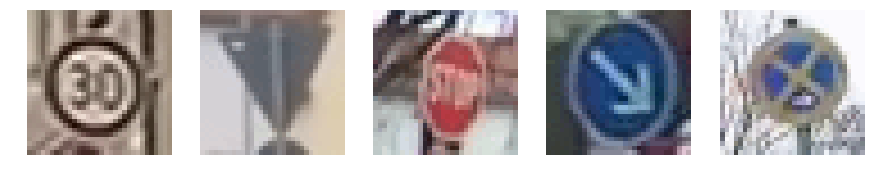

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
from numpy import array

# RGB values are already provided in RGB
sign1  = np.float32(mpimg.imread('test-images/Traffic_Sign1.png')) 
sign13 = np.float32(mpimg.imread('test-images/Traffic_Sign13.png')) 
sign14 = np.float32(mpimg.imread('test-images/Traffic_Sign14.png')) 
sign38 = np.float32(mpimg.imread('test-images/Traffic_Sign38.png')) 
signX  = np.float32(mpimg.imread('test-images/Traffic_SignX.png')) 
all_signs = array([sign1, sign13, sign14, sign38, signX])
y_signs   = [1, 13, 14, 38, ]
plt.figure()
fig, axs = plt.subplots(ncols=5, figsize=(5*3, 3))
for i in range(5):
    axs[i].imshow(all_signs[i])
    axs[i].axis('off')


### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
all_signs = preprocess(all_signs)

### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
BATCH_SIZE = 128
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

NameError: name 'tf' is not defined

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")